In [131]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [132]:
#sns.set(style="whitegrid", context="talk")
sns.set(style="whitegrid")
sns.set_color_codes("dark")

today = datetime.now().strftime('%d-%m-%Y')
week_num = datetime.now().strftime('%W')



In [133]:
week_num

'18'

In [134]:
PRACTICE = 'All'
FOLDER = '/020518'

In [135]:
os.chdir(u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/'+PRACTICE+FOLDER)

In [136]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/All/020518'

In [137]:
first = True

for filename in os.listdir(os.getcwd()):
    df = pd.read_excel(filename, sheet_name=None)
    
    sheet_names = df.keys()
    sheets = sheet_names[4:-1]

    print filename

    entity_count = len(sheets)
    print("Entity count: {0:d}".format(entity_count))
    
    for sh in sheets:
        if sh == u'PII Data Record': #this is an odd bug!
            print "this is odd! PII Data"
            continue
        df[sh].insert(loc=0, column='Filename', value=filename)
        df[sh].drop(0, inplace=True)
        df[sh]['Response'].fillna('No Response', inplace=True)
        df[sh]['Remediation Project Ref'].fillna('No Response', inplace=True)
        df[sh]['Response Comments'].fillna('', inplace=True)
        df[sh]['Delivery Date'].fillna('', inplace=True)
        df[sh]['Compliance Assessment'].fillna('N/A', inplace=True)
        if first:
            out_df = df[sh][['Filename','Req Ref',\
                             'Req nr',\
                             'Compliance Assessment',\
                             'Response',\
                             'Response Comments',\
                             'Delivery Date',\
                             'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count
            first = False
        else:
            cp_df = df[sh][['Filename','Req Ref',\
                            'Req nr',\
                            'Compliance Assessment',\
                            'Response',\
                            'Response Comments',\
                            'Delivery Date',\
                            'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count
            out_df = pd.concat([out_df, cp_df], axis=0, ignore_index=True, copy=True)

GDPR-RS-EPS029-IP-VPN--V4.1 300418.xlsx
Entity count: 4
GDPR-RS-EPS033-Dedicated Internet Access  (DIAoMSP)-V4.1 300418.xlsx
Entity count: 3
GDPR-RS-EPS028-Vodafone Messaging Hub-V4.1 300418.xlsx
Entity count: 4
GDPR-RS-EPS158-Dedicated Ethernet-V4.1 300418.xlsx
Entity count: 4
GDPR-RS-EPS031-Ethernet-V4.1 300418.xlsx
Entity count: 4
GDPR-RS-EPS118-Consolidated Spend Analytics-V4.1 300418.xlsx
Entity count: 4
GDPR-RS-EPS121-Global WAN-LAN--V4.1 300418.xlsx
Entity count: 4
GDPR-RS-EPS027-International Voice Connect (IVC)-V4.1 300418.xlsx
Entity count: 1
GDPR-RS-EPS156-DIA (Legacy)-V4.1 300418.xlsx
Entity count: 4


In [138]:
#out_df[out_df['Req Ref'].str.contains("EPS118-PCA-76V")]

#add product column
out_df['Product Ref'] = out_df['Req Ref'].str.slice(0, -2)

out_df['Product ID'] = out_df['Req Ref'].str.slice(3, 6)

out_df['Category'] = out_df['Req Ref'].str.slice(7, 10)

#out_df.drop_duplicates(['Product Ref'], keep='first', inplace=True)

mapping = {'No Response':'No Project Code'}

out_df['Orphan'] = out_df['Remediation Project Ref'].map(lambda x: mapping.get(x, 'Project Code Allocated'))

#out_df[out_df['Product ID'] == '022'].head(50)
#out_df.head()

In [139]:
iot_set = set([67,68,89,90,91,94,97,101,102,103,109,110])
cloud_set = set([43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116])
connectivity_set = set([10,12,21,22,24,27,28,29,31,33,42,66,72,80,81,118,121,156,158])
eit_set = set([126,136,141,128,130,129,198,127,1])
uc_set = set([2,4,5,7,8,9,14,70,71,87,123,193,194,195,147])

iot_cols = [67,68,89,90,91,94,97,101,102,103,109,110]
cloud_cols = [43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116]
connectivity_cols = [10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158]
eit_cols = [126,136,141,128,130,129,198,127,1]
uc_cols = [2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]

In [140]:
def return_practice( prod_id ):
    if int(prod_id) in iot_set:
        return 'IoT'
    elif int(prod_id) in cloud_set:
        return 'Cloud'
    elif int(prod_id) in connectivity_set:
        return 'Connectivity'
    elif int(prod_id) in eit_set:
        return 'EIT'
    elif int(prod_id) in uc_set:
        return 'UC'
    else:
        return 'Unknown Practice'

out_df['Practice'] = out_df['Product ID'].map(lambda x: return_practice(x))


In [141]:
out_df['Approved by DPO:'] = ""
out_df['If Approved, change to ?'] = ""
out_df['New Comment to be inserted into RS and DPIA'] = ""

In [142]:
output_writer = pd.ExcelWriter('../'+PRACTICE+'-REMEDIATION-STATS-Week'+week_num+'-'+today+'.xlsx')
out_df.to_excel(output_writer, 'REMEDIATION STATS')
output_writer.save()

Text(0.5,1,u'Chart to show all requirements and their response types: All 02-05-2018')

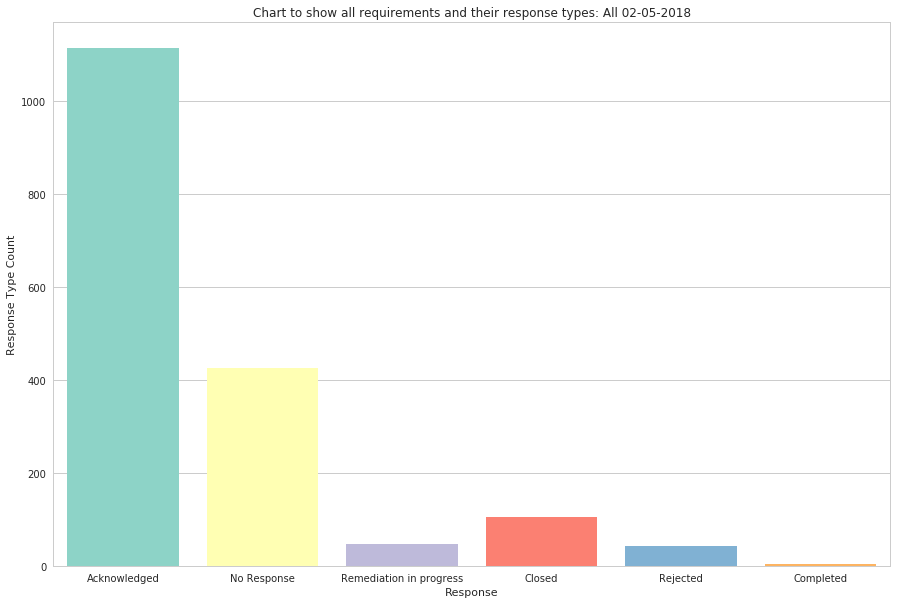

In [143]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Response', saturation=1, palette='Set3')
ax.set_ylabel("Response Type Count")
ax.set_title("Chart to show all requirements and their response types: "+PRACTICE+" "+today)

In [144]:
fig.savefig("../"+PRACTICE+"-fig-"+today+".png")

Text(0.5,1,u'Chart to show projects that do not have a project code assigned: All 02-05-2018')

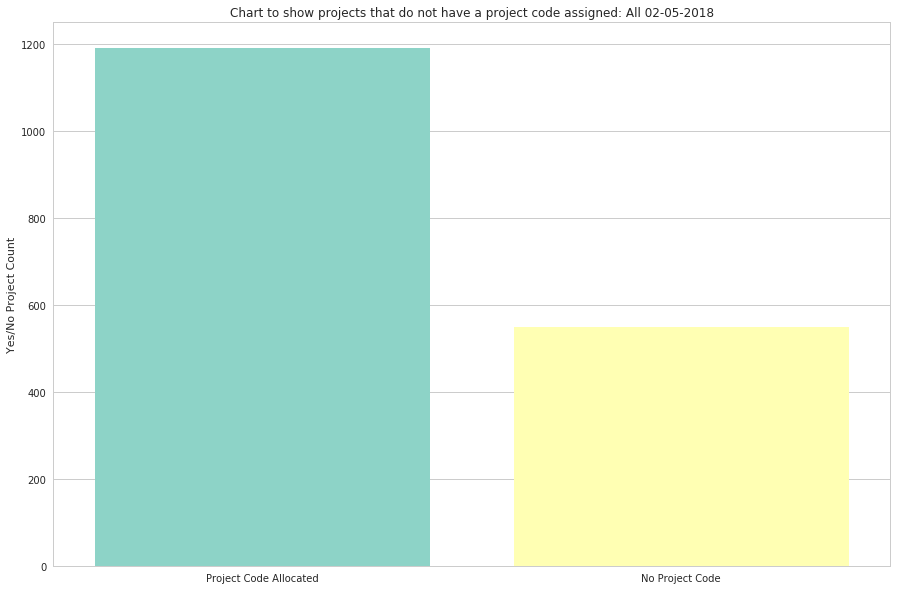

In [145]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Orphan', saturation=1, palette='Set3')
ax.set_ylabel("Yes/No Project Count")
ax.set_xlabel("")
ax.set_title("Chart to show projects that do not have a project code assigned: "+PRACTICE+" "+today)

In [146]:
fig.savefig("../"+PRACTICE+"-project-codes-fig-"+today+".png")
out_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Product ID,Category,Orphan,Practice,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,NON-COMPLIANT,tbc,4.0,GDPR-RS-EPS029-IP-VPN--V4.1 300418.xlsx,EPS-PCA-1H,EPS029-PCA-1H-A,1H,Acknowledged,Horizontal - PM to track,EPS029-PCA-1H,029,PCA,Project Code Allocated,Connectivity,,,
1,NON-COMPLIANT,2018-03-31 00:00:00,4.0,GDPR-RS-EPS029-IP-VPN--V4.1 300418.xlsx,GE-PCA-2H,EPS029-PCA-2H-A,2H,Acknowledged,Horizontal - PM to track,EPS029-PCA-2H,029,PCA,Project Code Allocated,Connectivity,,,
2,NON-COMPLIANT,,4.0,GDPR-RS-EPS029-IP-VPN--V4.1 300418.xlsx,No Response,EPS029-PCA-11H-A,11H,No Response,,EPS029-PCA-11H,029,PCA,No Project Code,Connectivity,,,
3,NON-COMPLIANT,2018-10-31 00:00:00,4.0,GDPR-RS-EPS029-IP-VPN--V4.1 300418.xlsx,PRJ03404,EPS029-PCA-11V-A,11V,Acknowledged,• A privacy notice is available here 'VGE Gene...,EPS029-PCA-11V,029,PCA,Project Code Allocated,Connectivity,,,
4,NON-COMPLIANT,,4.0,GDPR-RS-EPS029-IP-VPN--V4.1 300418.xlsx,No Response,EPS029-PCA-12H-A,12H,No Response,,EPS029-PCA-12H,029,PCA,No Project Code,Connectivity,,,


In [147]:
out_df['Orphan'].value_counts()

Project Code Allocated    1191
No Project Code            550
Name: Orphan, dtype: int64

In [148]:
#pd.get_dummies(out_df['Response'])
out_df['Response'].value_counts()

Acknowledged               1115
No Response                 427
Closed                      105
Remediation in progress      48
Rejected                     42
Completed                     4
Name: Response, dtype: int64

In [149]:
COLUMNS = {'PRIVACY_REQUIREMENT_CONTENT', 'REQ_NO', 'VERTICAL', 'HORIZONTAL', 'HYBRID', 'PC', 'NC'}

INDEX = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

req_content = ['']
vertical = [15, ]

uc_risk_df = pd.DataFrame(columns=COLUMNS, index=INDEX)


In [150]:
uc_risk_df

,PRIVACY_REQUIREMENT_CONTENT,VERTICAL,NC,HYBRID,PC,REQ_NO,HORIZONTAL
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,NaN,NaN,NaN,NaN,NaN,NaN,NaN
